In [1]:
import numpy as np
import pandas as pd
import string
import random

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Load the dataset
df = pd.read_csv('data/loans_full_schema.csv')

In [4]:
# Display the first few rows
df.head(15)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [5]:
#Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [6]:
# Check for missing values
print(df.isnull().sum())

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [7]:
# Examing descriptive statistics in columns
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [8]:
# Fill NaN values in key columns (annual_income, loan_amount, etc.) with appropriate defaults
df['annual_income'].fillna(df['annual_income'].mean(), inplace=True)
df['loan_amount'].fillna(0, inplace=True)  # Assuming 0 is the new for Nan or NA value

In [9]:
# For numerical columns with few missing values, we use the mean
df['debt_to_income'].fillna(df['debt_to_income'].mean(), inplace=True)
df['num_accounts_120d_past_due'].fillna(0, inplace=True)  # Replace NaN with 0
df['months_since_last_delinq'].fillna(0, inplace=True)  # Missing implies no delinquency
df['months_since_90d_late'].fillna(0, inplace=True)
df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].mean(), inplace=True)

# Handle joint income columns with a high percentage of missing data
df['annual_income_joint'].fillna(0, inplace=True)  # Assume no joint income for missing values
df['debt_to_income_joint'].fillna(0, inplace=True)  # Assume no debt for joint applicants

# For categorical columns with missing values, we use the mode or create an 'Unknown' category
df['emp_title'].fillna('Unknown', inplace=True)
df['emp_length'].fillna('Unknown', inplace=True)

In [10]:
# # Increase pandas display options for better visibility in the terminal
# pd.set_option('display.max_rows', None)    # Show all rows
# pd.set_option('display.max_columns', None) # Show all columns
# pd.set_option('display.width', None)       # Auto-adjust width of the output

In [11]:
# # Save all descriptive statistics and value counts to a file
# with open('descriptive_statistics_value_counts_full.txt', 'w') as f:
#     # Descriptive statistics for numerical columns
#     f.write("Descriptive statistics for numerical columns:\n")
#     f.write(str(df.describe()) + "\n\n")

#     # Descriptive statistics for categorical columns
#     f.write("Descriptive statistics for categorical columns:\n")
#     f.write(str(df.describe(include=['object'])) + "\n\n")

#     # Value counts for each column
#     f.write("Value counts for each column:\n")
#     for col in df.columns:
#         f.write(f"Value counts for {col}:\n")
#         f.write(str(df[col].value_counts()) + "\n\n")

In [12]:
# Add a 'source' column to indicate that these are from Lending Club
df['source'] = 'Lending Club'

In [13]:
#Loan number random generator
def generate_random_loan_number(length=10):
    """Generate a random alphanumeric loan number."""
    characters = string.ascii_letters + string.digits
    return ''.join(random.choice(characters) for _ in range(length))

In [31]:
# Define a function to generate normal, risky, and fraudulent loans
def generate_fake_loans(df, num_rows=100000):
    # Define mean and std values based on the descriptive statistics for key metrics
    annual_income_mean = df['annual_income'].mean()
    annual_income_std = df['annual_income'].std()
    loan_amount_mean = df['loan_amount'].mean()
    loan_amount_std = df['loan_amount'].std()

    # Create a new DataFrame of fake loans by sampling the original data
    fake_loans = df.sample(n=num_rows, replace=True).copy()
    
    # Add source for generated loans
    fake_loans['source'] = 'Fake Generator'
    
    # Generate random loan numbers
    fake_loans['loan_number'] = [f"LOAN_{i:06d}" for i in range(num_rows)]
    
    # Define loan type probabilities
    loan_type_probs = {'normal': 0.94, 'risky': 0.05, 'fraudulent': 0.01}
    
    for index in fake_loans.index:
        loan_type = np.random.choice(['normal', 'risky', 'fraudulent'], p=[loan_type_probs['normal'], loan_type_probs['risky'], loan_type_probs['fraudulent']])
        
        # Base adjustments for all loan types
        fake_loans.loc[index, 'annual_income'] *= np.random.uniform(0.9, 1.1)
        fake_loans.loc[index, 'loan_amount'] *= np.random.uniform(0.95, 1.05)
        fake_loans.loc[index, 'interest_rate'] += np.random.uniform(-0.5, 0.5)
        fake_loans.loc[index, 'debt_to_income'] *= np.random.uniform(0.95, 1.05)
        
        if loan_type == 'normal':
            # Normal loans: Subtle adjustments
            fake_loans.loc[index, 'balance'] *= np.random.uniform(0.98, 1.02)
            fake_loans.loc[index, 'installment'] *= np.random.uniform(0.99, 1.01)
        
        elif loan_type == 'risky':
            # Risky loans: More significant adjustments
            fake_loans.loc[index, 'debt_to_income'] *= np.random.uniform(1.2, 1.5)
            fake_loans.loc[index, 'num_accounts_120d_past_due'] += np.random.randint(0, 3)
            fake_loans.loc[index, 'months_since_last_delinq'] = np.random.uniform(1, 24)
            fake_loans.loc[index, 'interest_rate'] *= np.random.uniform(1.1, 1.3)
            fake_loans.loc[index, 'loan_status'] = np.random.choice(['Late (31-120 days)', 'In Grace Period', 'Current'], p=[0.4, 0.3, 0.3])
            fake_loans.loc[index, 'public_record_bankrupt'] = np.random.choice([0, 1], p=[0.8, 0.2])
        
        elif loan_type == 'fraudulent':
            # Fraudulent loans: Complex patterns
            fake_loans.loc[index, 'loan_amount'] *= np.random.uniform(1.5, 3)
            fake_loans.loc[index, 'interest_rate'] *= np.random.choice([0.5, 2], p=[0.5, 0.5])
            fake_loans.loc[index, 'annual_income'] *= np.random.uniform(2, 5)
            fake_loans.loc[index, 'debt_to_income'] *= np.random.uniform(0.2, 0.8)  # Unrealistically low
            fake_loans.loc[index, 'emp_title'] = np.random.choice(['CEO', 'Business Owner', 'Investor'], p=[0.4, 0.3, 0.3])
            fake_loans.loc[index, 'loan_status'] = 'Current'  # Always current to avoid immediate detection
            fake_loans.loc[index, 'tax_liens'] = np.random.choice([0, 1], p=[0.9, 0.1])
            fake_loans.loc[index, 'public_record_bankrupt'] = 0  # Clean record to avoid suspicion
            
            # Introduce subtle discrepancies
            if np.random.random() < 0.5:
                fake_loans.loc[index, 'installment'] = (fake_loans.loc[index, 'loan_amount'] / fake_loans.loc[index, 'term']) * np.random.uniform(0.95, 1.05)
        
        # Add a flag for fraud (1 for fraudulent, 0 for normal or risky)
        fake_loans.loc[index, 'is_fraud'] = 1 if loan_type == 'fraudulent' else 0
        
        # Add noise to all numeric columns to blur distinctions
        for column in fake_loans.select_dtypes(include=[np.number]).columns:
            if column not in ['is_fraud', 'loan_number']:
                fake_loans.loc[index, column] *= np.random.uniform(0.99, 1.01)
    
    return fake_loans

In [15]:
# Generate 100 fake loans
fake_loans = generate_fake_loans(df, num_rows=170000)

In [16]:
# Combine the Lending Club loans with fake loans
combined_loans = pd.concat([df, fake_loans], ignore_index=True)

In [17]:
# Generate random loan numbers for the original dataset
combined_loans['loan_number'] = [generate_random_loan_number() for _ in range(len(combined_loans))]

In [18]:
# After combining the original and fake loans
combined_loans['is_fraud'] = combined_loans['is_fraud'].fillna(0)

In [19]:
combined_loans

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,source,loan_number,is_fraud
0,global config engineer,3.0,NJ,MORTGAGE,90000.000000,Verified,18.010000,0.000000,NaN,0.000000,...,whole,Cash,27015.860000,1999.330000,984.140000,1015.190000,0.0,Lending Club,3KbHa9HB0p,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.000000,Not Verified,5.040000,0.000000,NaN,0.000000,...,whole,Cash,4651.370000,499.120000,348.630000,150.490000,0.0,Lending Club,lWmqxMNVlX,0.0
2,assembly,3.0,WI,RENT,40000.000000,Source Verified,21.150000,0.000000,NaN,0.000000,...,fractional,Cash,1824.630000,281.800000,175.370000,106.430000,0.0,Lending Club,FsuLwk3KmG,0.0
3,customer service,1.0,PA,RENT,30000.000000,Not Verified,10.160000,0.000000,NaN,0.000000,...,whole,Cash,18853.260000,3312.890000,2746.740000,566.150000,0.0,Lending Club,xNrCHwyQBX,0.0
4,security supervisor,10.0,CA,RENT,35000.000000,Verified,57.960000,57000.000000,Verified,37.660000,...,whole,Cash,21430.150000,2324.650000,1569.850000,754.800000,0.0,Lending Club,OMjFPztv7O,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,CEO,10.0,WI,MORTGAGE,198290.722257,Source Verified,14.350239,0.000000,NaN,0.000000,...,whole,Cash,5347.179828,1074.171813,769.808436,302.799147,0.0,Fake Generator,Ktvn7FinH4,0.0
179996,recruiter,10.0,MT,MORTGAGE,70528.594808,Source Verified,55.524507,84937.504835,Source Verified,33.656743,...,whole,Cash,4645.772503,893.350958,541.514203,338.080271,0.0,Fake Generator,Ezs9fAtCCJ,0.0
179997,CEO,4.0,IL,RENT,190440.015777,Not Verified,6.465812,0.000000,NaN,0.000000,...,fractional,Cash,8417.527614,1301.239036,891.301939,444.544674,0.0,Fake Generator,RBBeZenjAI,0.0
179998,"director, food and nutrition",10.0,NY,RENT,99140.925127,Verified,4.306562,0.000000,NaN,0.000000,...,whole,Cash,18418.837972,4034.101964,2188.149114,1675.571375,0.0,Fake Generator,zdsPuq6bJK,0.0


In [20]:
# Save the combined dataset
combined_loans.to_csv('combined_loan_data.csv', index=False)

In [21]:
#Data Stats(descriptive)
print(f"Total number of loans: {len(combined_loans)}")
print(f"Number of original loans: {len(df)}")
print(f"Number of fake loans: {len(fake_loans)}")

Total number of loans: 180000
Number of original loans: 10000
Number of fake loans: 170000


In [21]:
#Fraud Detection Model
def fraud_detection_model(df, important_features=None, correlation_threshold=0.1):
    # Fill NaN values in is_fraud column
    df['is_fraud'] = df['is_fraud'].fillna(0)

    # Select numeric columns for correlation analysis
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Calculate the correlation matrix
    correlation_matrix = df[numeric_columns].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

    # If important_features is not provided, use correlation-based selection
    if important_features is None:
        fraud_correlations = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
        important_features = fraud_correlations[fraud_correlations > correlation_threshold].index.tolist()
        important_features.remove('is_fraud')
    
    print(f"Using the following features:")
    print(important_features)

    # Prepare the features and target
    X = df[important_features]
    y = df['is_fraud']

    # Add some noise to features
    X = X + np.random.normal(0, 0.01, X.shape)

    # Split the data into training and testing sets - commented to generate more noise in training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create a pipeline with a more complex model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42))
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')
    print(f"\nCross-validation F1 scores: {cv_scores}")
    print(f"Mean F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Fit the model on the entire training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': important_features,
        'importance': pipeline.named_steps['classifier'].feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

    # Summarize results
    summary = {
        'Model': 'Random Forest Classifier',
        'Number of Features': len(important_features),
        'Cross-validation Mean F1 Score': f"{cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})",
        'Test Set Accuracy': f"{(y_pred == y_test).mean():.4f}",
        'ROC AUC': f"{roc_auc:.4f}",
        'Top 5 Important Features': feature_importance['feature'].head().tolist()
    }

    print("\nModel Summary:")
    for key, value in summary.items():
        print(f"{key}: {value}")

    return pipeline, important_features, summary

In [3]:
# Load the dataset
#combined_loans = pd.read_csv('combined_loan_data.csv')

In [16]:
# Define your important features - prevent overfitting
manual_features = [
    'annual_income',
    'loan_amount',
    'term',
    'interest_rate',
    'installment',
    'debt_to_income',
    'inquiries_last_12m',
    'account_never_delinq_percent',
    'total_credit_utilized',
    'num_historical_failed_to_pay',
    'public_record_bankrupt',
    'open_credit_lines'
]

In [22]:
# Verify all features exist in the DataFrame
for feature in manual_features:
    if feature not in combined_loans.columns:
        print(f"Warning: '{feature}' not found in DataFrame")

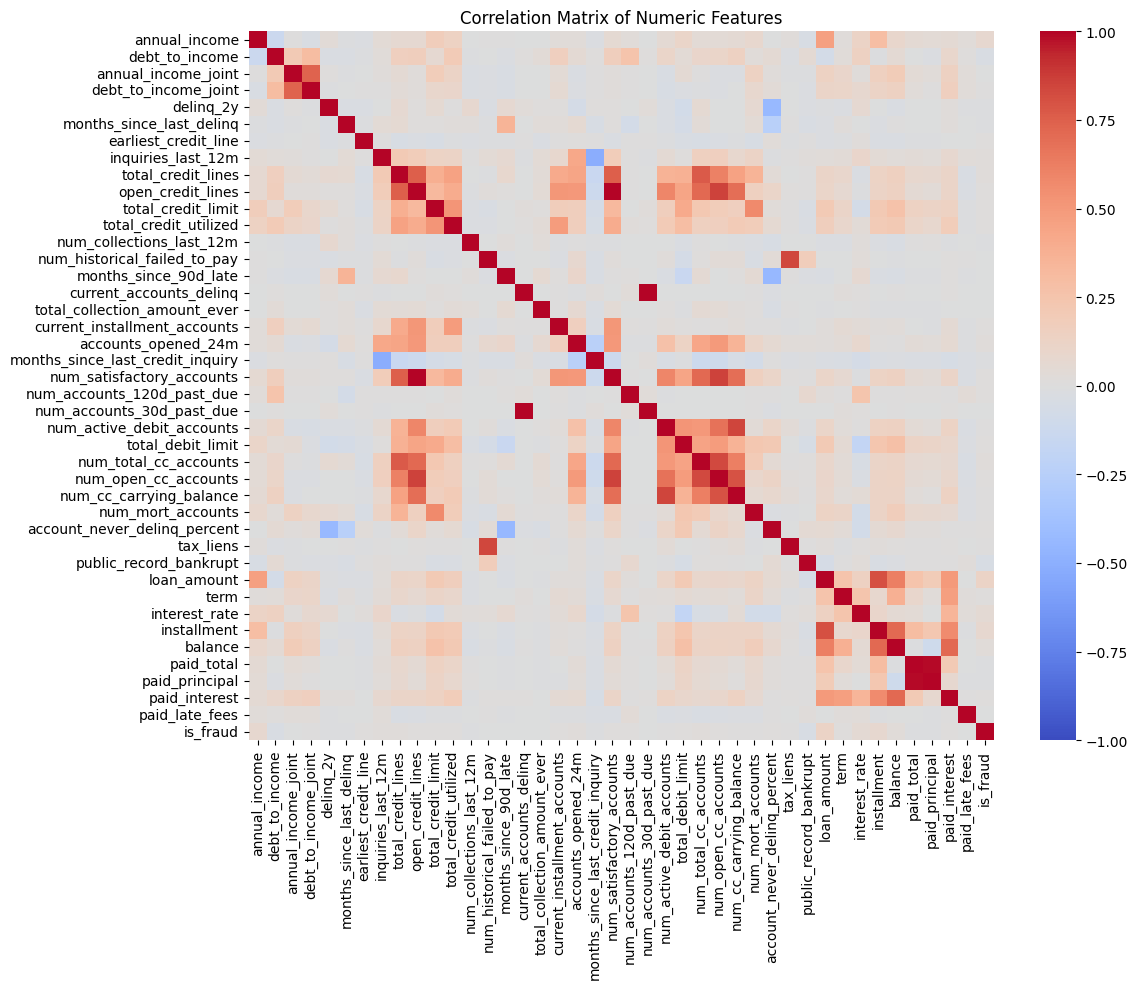

Using the following features:
['annual_income', 'loan_amount', 'term', 'interest_rate', 'installment', 'debt_to_income', 'inquiries_last_12m', 'account_never_delinq_percent', 'total_credit_utilized', 'num_historical_failed_to_pay', 'public_record_bankrupt', 'open_credit_lines']

Cross-validation F1 scores: [0.97681607 0.96723869 0.9625     0.95975232 0.96273292]
Mean F1 score: 0.9658 (+/- 0.0120)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35656
         1.0       0.92      0.96      0.94       344

    accuracy                           1.00     36000
   macro avg       0.96      0.98      0.97     36000
weighted avg       1.00      1.00      1.00     36000



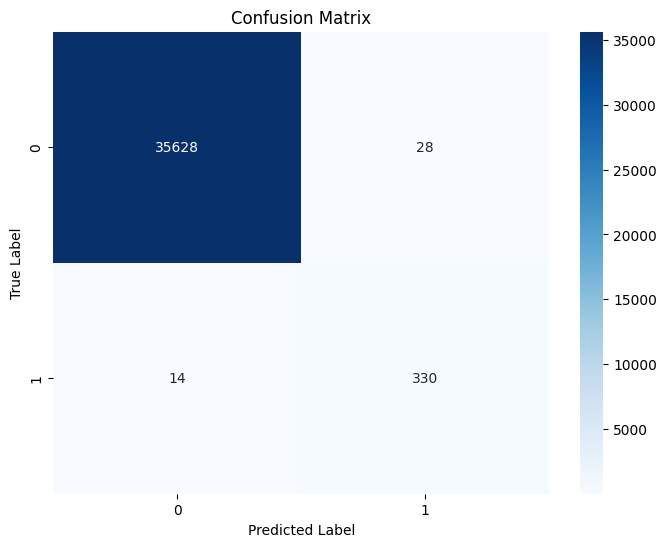

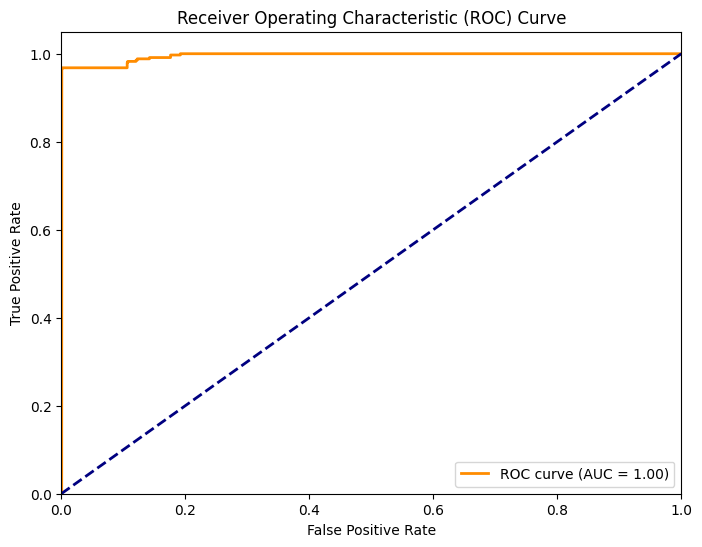

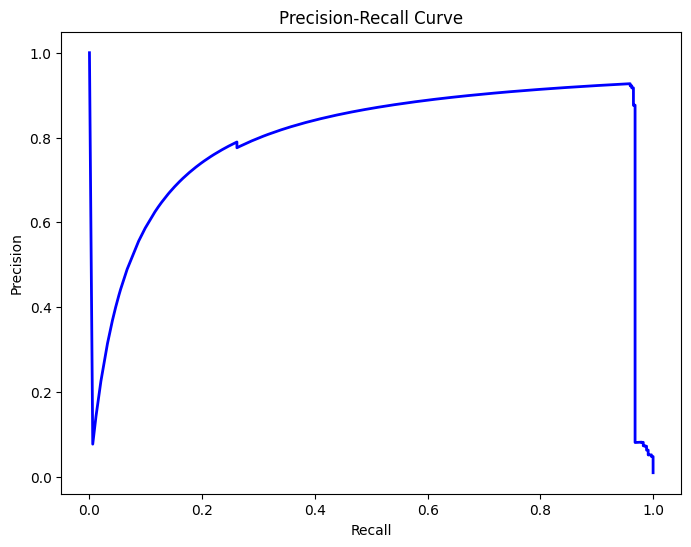

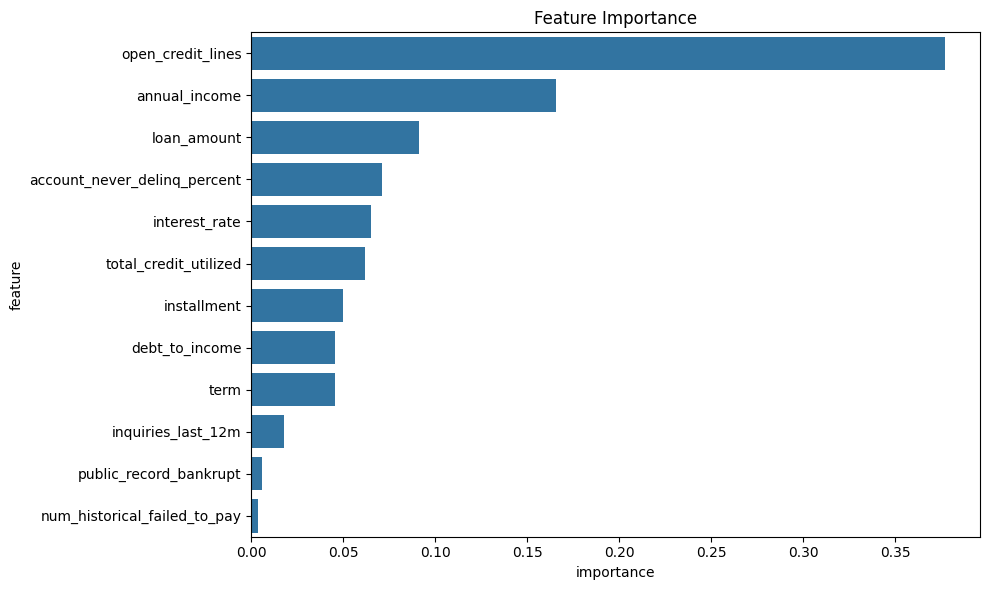


Model Summary:
Model: Random Forest Classifier
Number of Features: 12
Cross-validation Mean F1 Score: 0.9658 (+/- 0.0120)
Test Set Accuracy: 0.9988
ROC AUC: 0.9951
Top 5 Important Features: ['open_credit_lines', 'annual_income', 'loan_amount', 'account_never_delinq_percent', 'interest_rate']


In [23]:
# Run the fraud detection model
fraud_model, selected_features, summary = fraud_detection_model(combined_loans, important_features=manual_features)

In [24]:
# Print the summary
print("\nFraud Detection Model Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


Fraud Detection Model Summary:
Model: Random Forest Classifier
Number of Features: 12
Cross-validation Mean F1 Score: 0.9658 (+/- 0.0120)
Test Set Accuracy: 0.9988
ROC AUC: 0.9951
Top 5 Important Features: ['open_credit_lines', 'annual_income', 'loan_amount', 'account_never_delinq_percent', 'interest_rate']


In [25]:
# You can also access individual elements of the summary
print(f"\nThe model's ROC AUC score is: {summary['ROC AUC']}")
print(f"The top 5 most important features are: {', '.join(summary['Top 5 Important Features'])}")


The model's ROC AUC score is: 0.9951
The top 5 most important features are: open_credit_lines, annual_income, loan_amount, account_never_delinq_percent, interest_rate


In [27]:
fraud_distribution = combined_loans['is_fraud'].value_counts(normalize=True)
print("Distribution of fraudulent vs legitimate loans:")
print(fraud_distribution)

Distribution of fraudulent vs legitimate loans:
is_fraud
0.0    0.990917
1.0    0.009083
Name: proportion, dtype: float64


In [28]:
def categorize_loan(row):
    if row['is_fraud'] == 1:
        return 'Fraudulent'
    elif row['loan_status'] in ['Late (31-120 days)', 'Default']:
        return 'Risky'
    else:
        return 'Legitimate'

combined_loans['loan_category'] = combined_loans.apply(categorize_loan, axis=1)

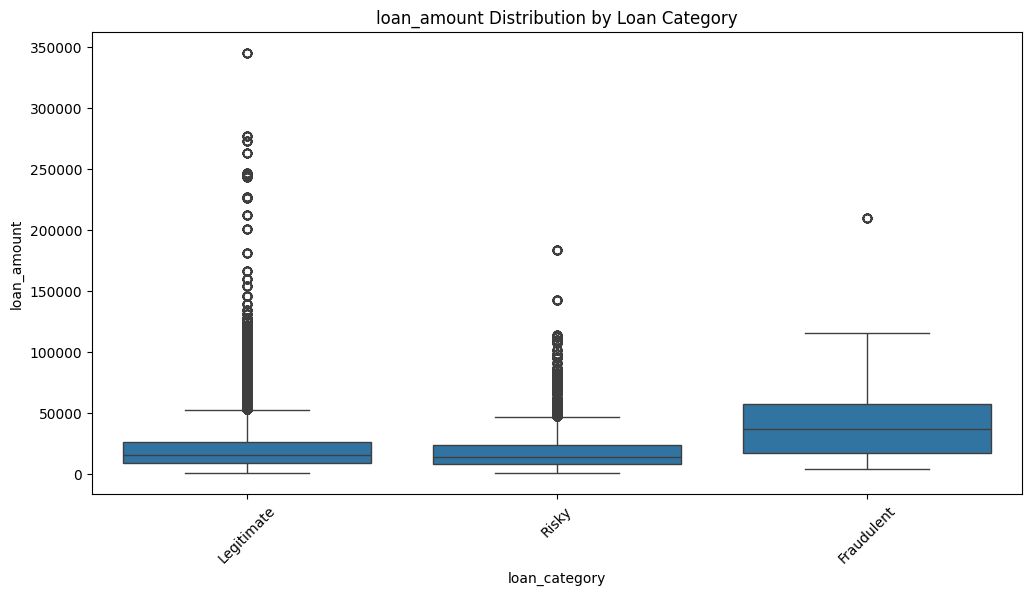

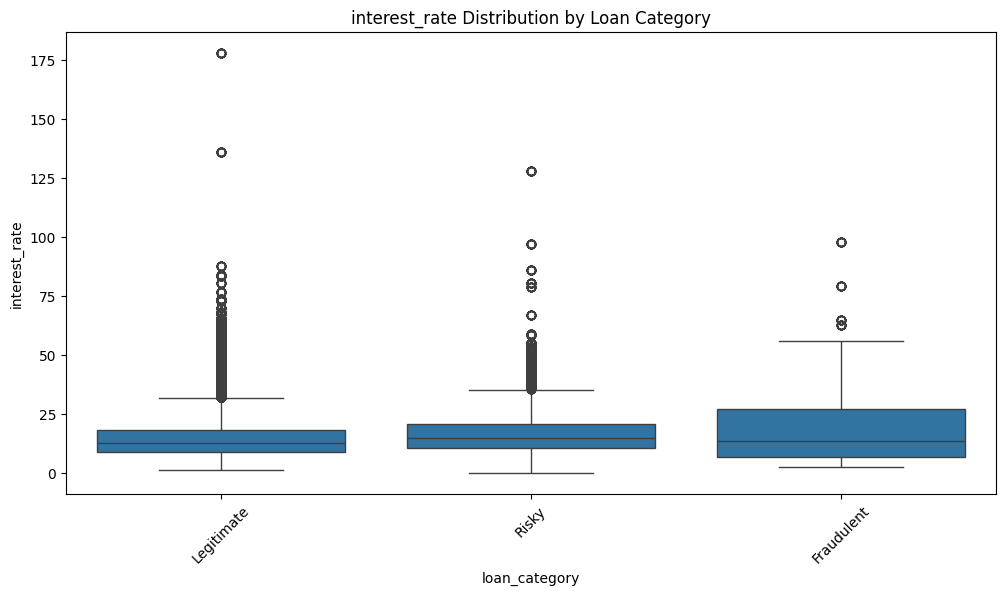

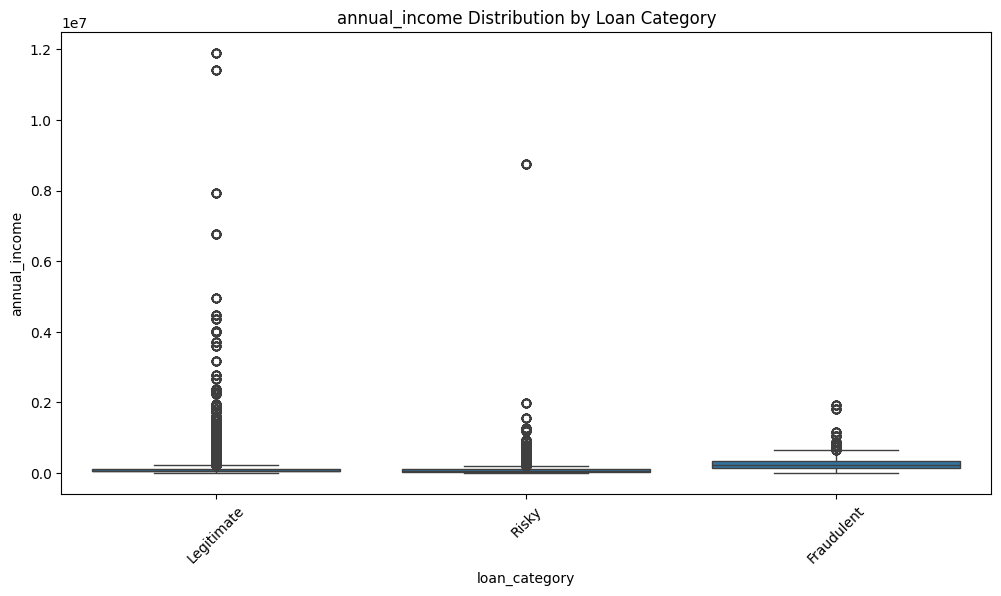

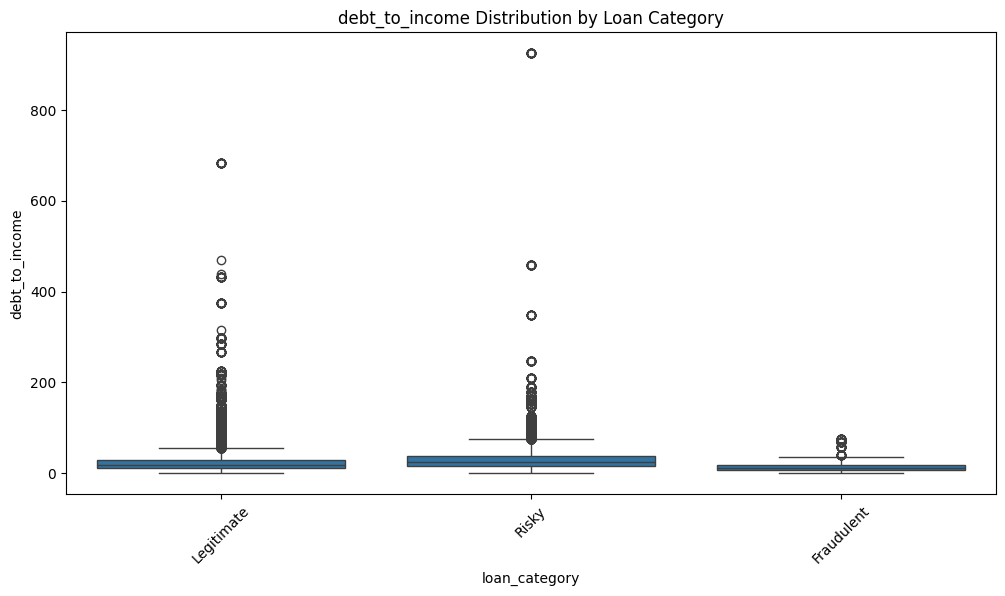

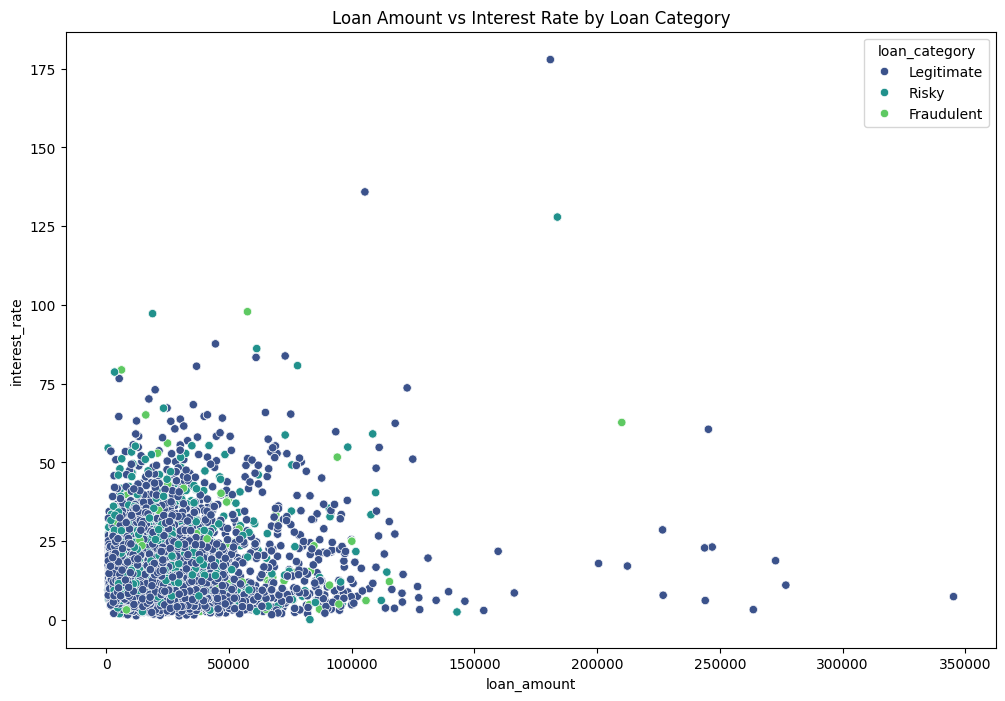

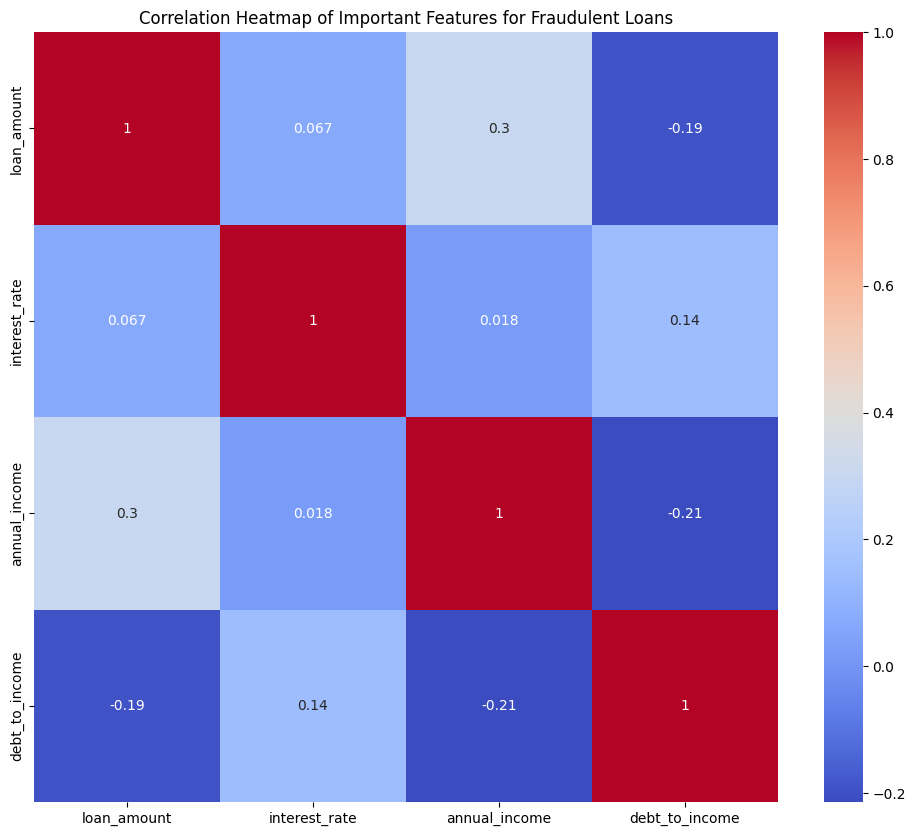

In [29]:
# Function to plot feature distributions by loan category
def plot_feature_by_category(data, feature):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='loan_category', y=feature, data=data)
    plt.title(f'{feature} Distribution by Loan Category')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for important features
important_features = ['loan_amount', 'interest_rate', 'annual_income', 'debt_to_income']
for feature in important_features:
    plot_feature_by_category(combined_loans, feature)

# Scatter plot with color-coded categories
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_loans, x='loan_amount', y='interest_rate', 
                hue='loan_category', palette='viridis')
plt.title('Loan Amount vs Interest Rate by Loan Category')
plt.show()

# Correlation heatmap for fraudulent loans
fraudulent_loans = combined_loans[combined_loans['is_fraud'] == 1]
plt.figure(figsize=(12, 10))
sns.heatmap(fraudulent_loans[important_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Important Features for Fraudulent Loans')
plt.show()

In [30]:
from scipy import stats

def compare_distributions(data, feature):
    legitimate = data[data['is_fraud'] == 0][feature]
    fraudulent = data[data['is_fraud'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(legitimate, fraudulent)
    
    print(f"Comparison of {feature} between legitimate and fraudulent loans:")
    print(f"Legitimate mean: {legitimate.mean():.2f}")
    print(f"Fraudulent mean: {fraudulent.mean():.2f}")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    print("--------------------")

for feature in important_features:
    compare_distributions(combined_loans, feature)

Comparison of loan_amount between legitimate and fraudulent loans:
Legitimate mean: 19906.92
Fraudulent mean: 43134.75
T-statistic: -50.24
P-value: 0.0000
--------------------
Comparison of interest_rate between legitimate and fraudulent loans:
Legitimate mean: 15.32
Fraudulent mean: 20.02
T-statistic: -20.47
P-value: 0.0000
--------------------
Comparison of annual_income between legitimate and fraudulent loans:
Legitimate mean: 121156.70
Fraudulent mean: 334796.72
T-statistic: -30.18
P-value: 0.0000
--------------------
Comparison of debt_to_income between legitimate and fraudulent loans:
Legitimate mean: 24.27
Fraudulent mean: 14.90
T-statistic: 15.52
P-value: 0.0000
--------------------


In [26]:
import pickle
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(fraud_model, file)

In [35]:
#Creating random dataset to put in the model on streamlit
random_loans = generate_fake_loans(df, num_rows=10000)

In [36]:
# Save the combined dataset
random_loans.to_csv('random_loans_streamlit_drop.csv', index=False)